In [1]:
import med_dataloader as mdl
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [2]:
num_classes = 7

In [3]:
os.getcwd()

'c:\\Users\\matte\\Desktop\\Network-Vocal_Tract_Segmentation'

# Generazione Dataset
## 

In [4]:
mdl.generate_dataset(data_dir= os.path.join(os.getcwd(), "Dataset_Prova"),
                        imgA_label="Images",
                        imgB_label="Segmentation_checked",
                        input_size=256,
                        is_B_categorical=True,
                        num_classes=num_classes,
                        norm_boundsA=[0,255], #normalizza tra 0 e 1; bisogna mettere lower_bound,upper_bound dell'immagine corrente!!! (non i limiti che si vogliono raggiungere)
                        norm_boundsB=None,
                        )

Caching decoded images in c:\Users\matte\Desktop\Tesi\Network\Dataset_Prova_TF\Images.cache...
460/460
Cached decoded images in c:\Users\matte\Desktop\Tesi\Network\Dataset_Prova_TF\Images.cache.
Caching decoded images in c:\Users\matte\Desktop\Tesi\Network\Dataset_Prova_TF\Segmentation_checked.cache...
460/460
Cached decoded images in c:\Users\matte\Desktop\Tesi\Network\Dataset_Prova_TF\Segmentation_checked.cache.


In [5]:
train_ds, validation_ds, test_ds = mdl.get_dataset(data_dir = os.path.join(os.getcwd(), "Dataset_Prova_TF"),
                                                    percentages = [0.8, 0.1, 0.1],
                                                    batch_size = 4,
                                                    train_augmentation = False,
                                                    random_crop_size = None,
                                                    random_rotate = False,
                                                    random_flip = False,
                                                    )

## Controllo massimo e minimo

In [6]:
import numpy as np

max = 0
min = 255
for batch in train_ds.take(93): #meno hc
    volume_batch, label_batch = batch
    for i in range(4): #meno hc
        max_start = np.max(volume_batch[i,:,:])
        min_start = np.min(volume_batch[i,:,:])
        if max_start > max:
            max = max_start
        if min_start < min:
            min = min_start

#print(np.shape(volume_batch))
print(max, min)

1.0 0.0


## Plottaggio dataset

<BatchDataset shapes: ((None, 256, 256, None), <unknown>), types: (tf.float32, tf.uint8)>
Batch n°:  0


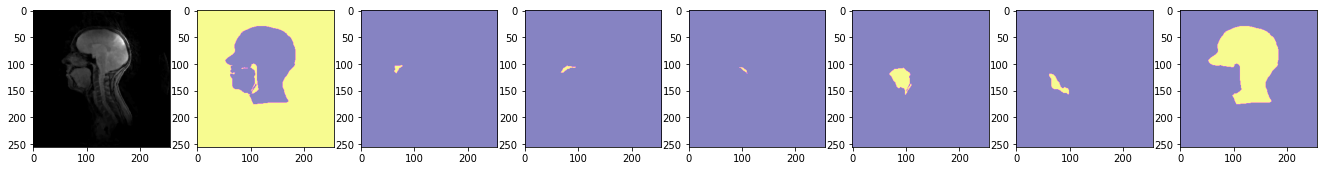

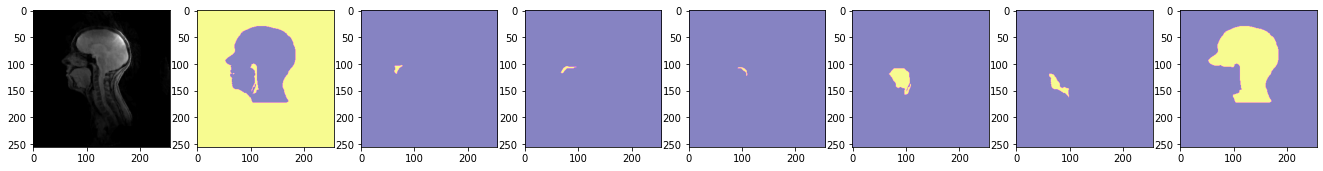

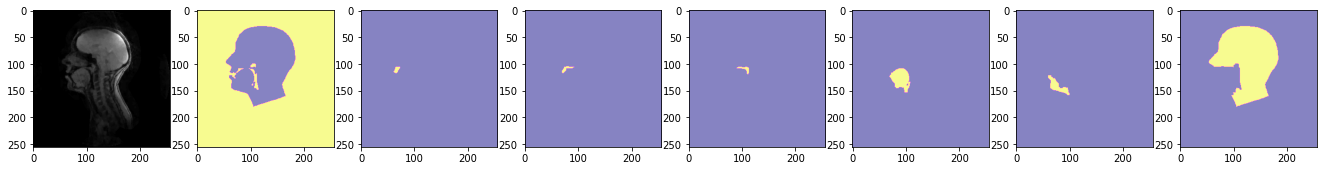

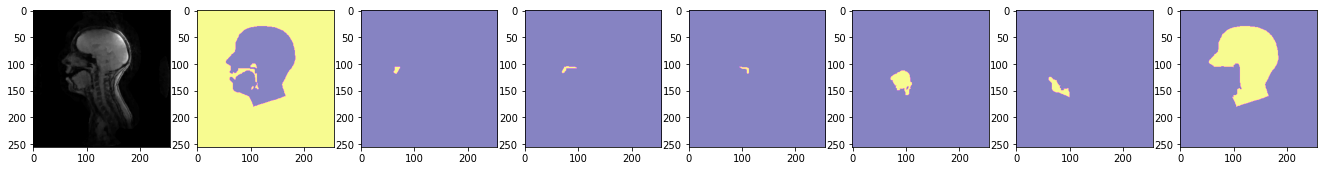

Batch n°:  1


KeyboardInterrupt: 

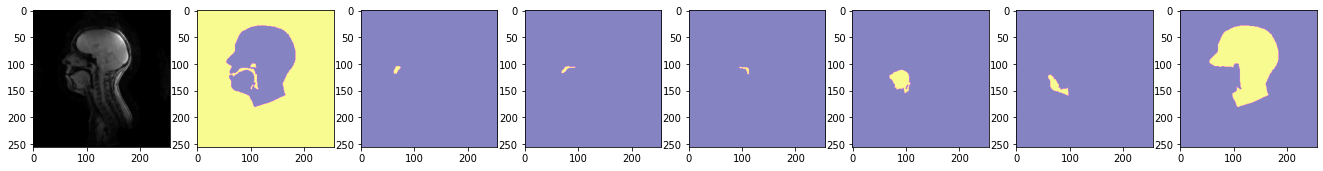

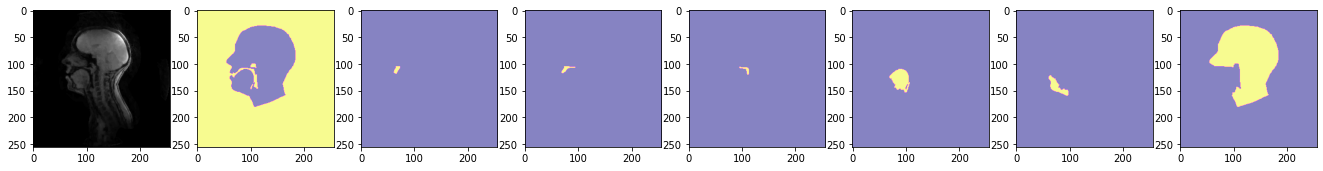

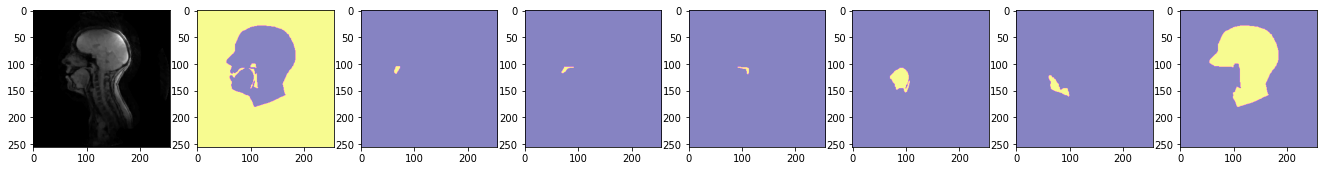

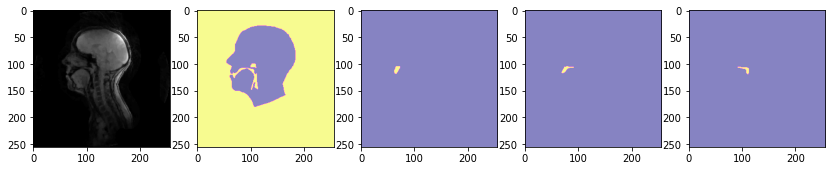

In [7]:

import matplotlib.pyplot as plt
print(train_ds)

batch_n = 0

for batch in train_ds.take(93):  #rendi meno hard code 
    volume_batch, label_batch = batch
    #fig = plt.figure(figsize = [23, 7])
    print("Batch n°: ", batch_n)
    batch_n = batch_n + 1

    for volume, label in zip(volume_batch, label_batch):
        fig = plt.figure(figsize = [23, 7]) #creo ogni ciclo la figura bianca
        plt.subplot(1, num_classes + 1, 1) #creo le colonne e le righe
        plt.imshow(volume[:,:,0], cmap="gray") #ploto l'immagine

        for i in range(num_classes):
            
            plt.subplot(1, num_classes + 1, i+2) #muovo l'indice di colonna per plottare le varie classi 
            plt.imshow(label[:,:,i], cmap="plasma", alpha=0.5) #plotto le classi 
    plt.show(fig) #stampo il tutto